In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

# Read and explore the data

In [3]:
df=pd.read_csv('Bank customer data.csv')

In [234]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [267]:
df.shape

(10000, 14)

In [95]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

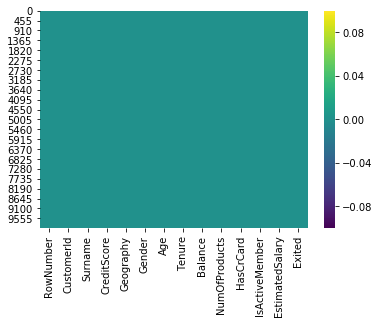

In [67]:
sns.heatmap(df.isnull(),cmap='viridis') # no null values

In [6]:
# Exited: 0=no longer a customer of the bank. 1= still is
# predict thr result of 'Existed' from the other independent variables
# tenure = how long the customer is with the bank

In [7]:
# remove variables that does not correlate with the dependent variable

In [27]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [9]:
df.iloc[3:13] # the rows from 3 to 12

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0


In [10]:
df.iloc[:,3:13].head() # all the rows and from column 4 to 12

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [26]:
X=df.iloc[:,3:13].values
y=df.iloc[:,13].values

In [236]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ..., 
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [237]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [27]:
# encoding categorial data (geography and gender)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_x_1=LabelEncoder()
# geography has 3 categories, and will change to 0,1,2
# X[:,1] :all the rows and second column which is frence
X[:,1]=le_x_1.fit_transform(X[:,1]) 

# this is better than using d=['':0, '':1...], df[]=d[].map(d).. which i used before

In [28]:
X[:,1]

array([0, 2, 0, ..., 0, 1, 0], dtype=object)

In [29]:

le_x_2=LabelEncoder()
# gender contain 2 categories, will change to 0,1
# X[:,2]: all the rows and the 3rd column-gender
X[:,2]=le_x_2.fit_transform(X[:,2]) 


In [30]:
print(X[:,2])

[0 0 0 ..., 0 1 0]


In [17]:
X 

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ..., 
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [144]:
# create dummy varianbles for geography because it contains 3 categories, 
# and need to remove one to prevent falling into the dummie variables trap. (need to do research on this)

In [145]:
# df.get_dummies - this also works, but using dummies will not work on all variables st once

In [31]:
onehotencoder=OneHotEncoder(categorical_features=[1])
X=onehotencoder.fit_transform(X).toarray()

In [32]:
X.shape

(10000, 12)

In [22]:
X # somehow geography is placed before credit score

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   1.01348880e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   1.12542580e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   1.13931570e+05],
       ..., 
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   4.20855800e+04],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   9.28885200e+04],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   3.81907800e+04]])

In [247]:
# remove 1 dummie variable in geography 
# the first 3 columsn are the dummies variables for geography

In [33]:
X=X[:,1:] # exclude the first column

In [34]:
X

array([[  0.00000000e+00,   0.00000000e+00,   6.19000000e+02, ...,
          1.00000000e+00,   1.00000000e+00,   1.01348880e+05],
       [  0.00000000e+00,   1.00000000e+00,   6.08000000e+02, ...,
          0.00000000e+00,   1.00000000e+00,   1.12542580e+05],
       [  0.00000000e+00,   0.00000000e+00,   5.02000000e+02, ...,
          1.00000000e+00,   0.00000000e+00,   1.13931570e+05],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   7.09000000e+02, ...,
          0.00000000e+00,   1.00000000e+00,   4.20855800e+04],
       [  1.00000000e+00,   0.00000000e+00,   7.72000000e+02, ...,
          1.00000000e+00,   0.00000000e+00,   9.28885200e+04],
       [  0.00000000e+00,   0.00000000e+00,   7.92000000e+02, ...,
          1.00000000e+00,   0.00000000e+00,   3.81907800e+04]])

In [35]:
X.shape

(10000, 11)

In [151]:
# start to train the data

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [298]:
# do we need to apply feature scaling in ANN or DP? yes absolutely
# reasons:
# a lot of computations, and need to apply feature scaler to ease these calculations.
# and we dont want to have one independent variable dominate another one

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [45]:
X_train

array([[-0.5698444 ,  1.74309049,  0.16958176, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 1.75486502, -0.57369368, -2.30455945, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.5698444 , -0.57369368, -1.19119591, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ..., 
       [-0.5698444 , -0.57369368,  0.9015152 , ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.5698444 ,  1.74309049, -0.62420521, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [ 1.75486502, -0.57369368, -0.28401079, ...,  0.64259497,
        -1.03227043,  0.32472465]])

# Start building the ANN. 

In [46]:
import keras
from keras.models import Sequential # use to initialize the neural network
from keras.layers import Dense # create the layers 

Using TensorFlow backend.


In [302]:
# the 7 steps
# 1,dense: (the first step in the lecture notes about 7 steps)
#2, number of nodes =number of independent variables (11)
# 3, activation function (retifier function for the hidden layer and sigmoid function for the output layer)
# 4, and so on

In [303]:
# initialising the ANN
classifier = Sequential()

In [306]:
# add the input layer and the 1st hidden layer
# 6 nodes for the hidden layer= (11+1)/2 :  11 = number of input, and number of out put(y:1). see x_train.shape and y_train.shape
# init=relate to step 1. will make sure the weights are small and close to 0
# activation function for hidden layer = rectifier function(relu). for output layer = sigmoid function
classifier.add(Dense(input_dim=11,output_dim=6,kernel_initializer='uniform', activation='relu'))

In [308]:
# second hidden layer
# the first did not know what to expect, so it need the 11 input nodes
# the second and so on hidden layer know what to expect from the previous one
classifier.add(Dense(output_dim=6,kernel_initializer='uniform', activation='relu'))

In [310]:
# final layer : output layer
# output_dim becmae 1 because it is binary outcome: customer leave or stay
# in order to get the probability of the customer stay or leave, we need to change the activation function to sigmoid
# if the outcome more than classies. output_dim is 3 or more base on the number of that class
# , and activation function is softmax
classifier.add(Dense(output_dim=1,kernel_initializer='uniform', activation='sigmoid'))

In [312]:
# compile the ANN
# the weight is just initilized. now we need to find the best weights that 
# will make the neural network the most powerful (optimizer='adam')

# if the output function is sigmoid which is binary outcome, then the Mclaws function is call 'binary_cross_entropy'
# if the outcome is more than 2 categories, it willl be called 'categorical_cross_entropy'

# metrics = a criteria that is chosen to evaluate the model
# when the weights are updated after each observation or each batch of many observation. the algorithm uses this accuracy 
# criterion to improve the models performance. when fitting the ANN in to the training sets, the accuracy is going to 
#increase little by little til reach top accuracy. this is because the choose of the 
#accuracy metrics (metrics=['accuracy])
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [314]:
# now fit the ANN to the training set
# tow extra arguments: batch size, we can choose to update the weights either after each obervation passing through
# ANN or after a batch of observations. so, the first one is the batch size.

# the 2: epochs: apply step 1 to 6 over many epochs

# for now use fixed batch size and epochs. 

classifier.fit(X_train, y_train, batch_size=10, epochs=100)

# Prediction and evaluation

In [328]:
pred = classifier.predict(X_test)
pred=(pred>0.5) # customer will need the bank

In [330]:
print(X.size)
print(y.size)
print(X_train.size)
print(y_train.size)
print(X_test.size)
print(y_test.size)

110000
10000
88000
8000
22000
2000


In [331]:
# 1558 = actual left and predicted also left
# 37 = type 1 error. left but predicted not
# 284 trpe 2 error. not left but predicted as left
# 121 not left and predicted also not left

# (1558+121)/2000 = 83%=correct prediction

In [334]:
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(y_test,pred))
print (classification_report(y_test,pred)) # 67% without classifier.fit

             precision    recall  f1-score   support

          0       0.86      0.97      0.91      1595
          1       0.77      0.35      0.48       405

avg / total       0.84      0.85      0.82      2000



# Testing

In [269]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [276]:
X[0:3]
# frence is the first 2, 0 and 0

# using d=['':0, '':1...], df[]=d[].map(d).. which i used before looks better if there are a lot of categories in a column

array([[  0.00000000e+00,   0.00000000e+00,   6.19000000e+02,
          0.00000000e+00,   4.20000000e+01,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.01348880e+05],
       [  0.00000000e+00,   1.00000000e+00,   6.08000000e+02,
          0.00000000e+00,   4.10000000e+01,   1.00000000e+00,
          8.38078600e+04,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.12542580e+05],
       [  0.00000000e+00,   0.00000000e+00,   5.02000000e+02,
          0.00000000e+00,   4.20000000e+01,   8.00000000e+00,
          1.59660800e+05,   3.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.13931570e+05]])

In [ ]:
# thiese info need to be in the same order as before
eography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $60000
Number of Products: 2
Does this customer have a credit card  Yes
Is this customer an Active Member: Yes
Estimated Salary: $50000

In [340]:
# the info need to put in a horizontal vector using [[]]. []=verticle
# need to sclae the data like before
New_pred=classifier.predict(sc.transform(np.array([[0.0,0,600,0,40,3,60000,2,1,1,50000]])))

In [341]:
print(New_pred)

[[ 0.10660119]]


In [337]:
New_pred=(New_pred>0.5)
print(New_pred)

[[False]]


In [ ]:
# the customer does not leave the bank. 

In [227]:
#If i use logistic regression

In [251]:
df=pd.read_csv('Churn_Modelling.csv')

In [252]:
X=df.iloc[:,3:13].values
y=df.iloc[:,13].values

In [253]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_x_1=LabelEncoder()
X[:,1]=le_x_1.fit_transform(X[:,1]) # geography has 3 categories, and will change to 0,1,2

le_x_2=LabelEncoder()
X[:,2]=le_x_2.fit_transform(X[:,2])

In [254]:
onehotencoder=OneHotEncoder(categorical_features=[1])
X=onehotencoder.fit_transform(X).toarray()
X=X[:,1:] 

In [255]:
print (X)
print ('\n')
print (y)

[[  0.00000000e+00   0.00000000e+00   6.19000000e+02 ...,   1.00000000e+00
    1.00000000e+00   1.01348880e+05]
 [  0.00000000e+00   1.00000000e+00   6.08000000e+02 ...,   0.00000000e+00
    1.00000000e+00   1.12542580e+05]
 [  0.00000000e+00   0.00000000e+00   5.02000000e+02 ...,   1.00000000e+00
    0.00000000e+00   1.13931570e+05]
 ..., 
 [  0.00000000e+00   0.00000000e+00   7.09000000e+02 ...,   0.00000000e+00
    1.00000000e+00   4.20855800e+04]
 [  1.00000000e+00   0.00000000e+00   7.72000000e+02 ...,   1.00000000e+00
    0.00000000e+00   9.28885200e+04]
 [  0.00000000e+00   0.00000000e+00   7.92000000e+02 ...,   1.00000000e+00
    0.00000000e+00   3.81907800e+04]]


[1 0 1 ..., 1 1 0]


In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [257]:
# no scaler

In [258]:
from sklearn.linear_model import LogisticRegression
lorm=LogisticRegression()

In [259]:
lorm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [260]:
pred_lorm=lorm.predict(X_test)

In [261]:
print (confusion_matrix(y_test,pred_lorm))
print (classification_report(y_test,pred_lorm))

[[1545   50]
 [ 377   28]]
             precision    recall  f1-score   support

          0       0.80      0.97      0.88      1595
          1       0.36      0.07      0.12       405

avg / total       0.71      0.79      0.72      2000



In [262]:
# if use standardscaler

In [265]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [266]:
lorm.fit(X_train, y_train)
pred_lorm=lorm.predict(X_test)
print (confusion_matrix(y_test,pred_lorm))
print (classification_report(y_test,pred_lorm))

[[1540   55]
 [ 319   86]]
             precision    recall  f1-score   support

          0       0.83      0.97      0.89      1595
          1       0.61      0.21      0.32       405

avg / total       0.78      0.81      0.77      2000



In [ ]:
# ANN=83%, logistic=78% 